In [6]:
import pandas as pd

data = pd.read_csv('mushrooms.csv')

In [8]:
pd.set_option('display.max_columns', None)

In [11]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 8124
Number of Columns 23


In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [18]:
data = data.astype('category')

In [22]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 29.5 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [24]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [25]:
x = data.drop('class', axis=1)
y = data['class']

In [30]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=7)
pca_fit = pca1.fit_transform(x)

In [31]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [32]:
sum(pca1.explained_variance_ratio_)

np.float64(0.850168163508622)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_fit, y, test_size=0.20, random_state=42)

# Import the models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

svc = SVC()
svc.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

rm = RandomForestClassifier()
rm.fit(x_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [39]:
y_pred1 = lr.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = svc.predict(x_test)
y_pred4 = dt.predict(x_test)
y_pred5 = rm.predict(x_test)
y_pred6 = gb.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [51]:
print("ACC LR", accuracy_score(y_test, y_pred1))
print("ACC KNN", accuracy_score(y_test, y_pred2))
print("ACC SVC", accuracy_score(y_test, y_pred3))
print("ACC DT", accuracy_score(y_test, y_pred4))
print("ACC RM", accuracy_score(y_test, y_pred5))
print("ACC GBC", accuracy_score(y_test, y_pred6))

ACC LR 0.8344615384615385
ACC KNN 0.9833846153846154
ACC SVC 0.952
ACC DT 0.9766153846153847
ACC RM 0.9975384615384615
ACC GBC 0.9384615384615385


In [62]:
results = pd.DataFrame({'Models': ['LR', 'KNN', 'SVC', 'DT', 'RM', 'GBC'], 'ACC': [accuracy_score(y_test, y_pred1) * 100,
                                                                         accuracy_score(y_test, y_pred2) * 100,
                                                                         accuracy_score(y_test, y_pred3) * 100,
                                                                         accuracy_score(y_test, y_pred4) * 100,
                                                                         accuracy_score(y_test, y_pred5) * 100,
                                                                         accuracy_score(y_test, y_pred6) * 100]})

In [54]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.9 MB/s eta 0:00:0031m40.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 51.6 MB/s eta 0:00:00


# Visualize models accuracy

In [55]:
import seaborn as sns

,Models,ACC
0,LR,83.446154
1,KNN,98.338462
2,SVC,95.200000
3,DT,97.661538
4,RM,99.753846
5,GBC,93.846154


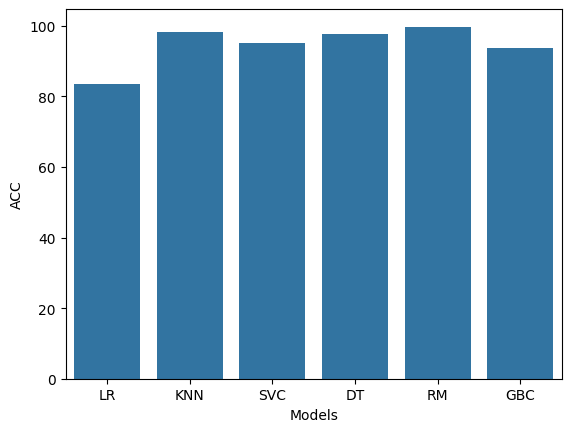

In [63]:
sns.barplot(x=results['Models'], y=results['ACC'])
results

# Save model

In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(pca_fit, y)

RandomForestClassifier()

In [67]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rf_model, pickle_out) 
pickle_out.close()

# Loading model and trying to use it

In [68]:
import pickle
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

RandomForestClassifier()

In [72]:
prediction = classifier.predict(pca1.transform([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]]))[0]

/home/retro/Desktop/projects/mushrooms/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [73]:
print("DANGER") if prediction == 1 else print("OK")

DANGER
